In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [5]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


## Data Preprocessing 

In [6]:
data.shape

(7920, 3)

In [7]:
data.duplicated().sum()

np.int64(0)

In [8]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

## Text Preprocessing 

In [9]:
import re
import string

CONVERT UPPER CASE TO LOWER CASE

In [10]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [11]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

REMOVE LINKS

In [12]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '',x, flags= re.MULTILINE)  for x in x.split() ) )

In [15]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

Remove punctuations

In [13]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [14]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [12]:
data["tweet"].head(5)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

In [15]:
data["tweet"] = data['tweet'].str.replace(r'\d+', '', regex=True)

In [16]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

Remove Stopwords

In [17]:
!pip install nltk


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:

import nltk

In [19]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [18]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [19]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [20]:

data["tweet"].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object


Stemming

In [21]:

from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [22]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [23]:
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [32]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


## Building Vacabulary

In [23]:
from collections import Counter
vocab = Counter()

In [24]:
vocab

Counter()

In [25]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [26]:
len(vocab)

18272

In [37]:
data.shape

(7920, 3)

In [27]:
tokens = [key for key in vocab if vocab[key] > 10]

In [28]:
tokens

['android',
 'apps',
 'beautiful',
 'cute',
 'health',
 'igers',
 'iphoneonly',
 'iphonesia',
 'iphone',
 'finally',
 'a',
 'case',
 'thanks',
 'to',
 'my',
 'yay',
 'sony',
 'xperia',
 's',
 'we',
 'love',
 'this',
 'would',
 'you',
 'go',
 'talk',
 'relax',
 'smartphone',
 'wifi',
 'connect',
 'im',
 'i',
 'know',
 'was',
 'made',
 'that',
 'way',
 'home',
 'what',
 'amazing',
 'service',
 'apple',
 'wont',
 'even',
 'me',
 'about',
 'have',
 'pay',
 'them',
 'for',
 'their',
 'stupid',
 'support',
 'software',
 'update',
 'fucked',
 'up',
 'phone',
 'big',
 'time',
 'iphones',
 'happy',
 'us',
 'instapic',
 'instadaily',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cable',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'starting',
 'technology',
 'samsunggalaxys',
 'iphonex',
 'shopping',
 'again',
 'listening',
 'music',
 'likeforlike',
 'photo',
 'fun',
 'selfie',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'hey',
 'when',
 'make',
 'ipod',
 'dont',
 'it

In [29]:
len(tokens)

1270

In [30]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

## Divide Dataset

In [31]:
X = data['tweet']
y = data['label']

In [32]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
X_train

5596    best twwitter word twitter iphone internet sns...
4990    sony autopayments  your stupid feature just fu...
7003     off codefindgifts  … via redbubble redbubble ...
3616    my girls and me samsung galaxy s family collag...
7272    months amazonprimevideo  free – no catch  ston...
                              ...                        
3752    yay new game ps sony playstation need for spee...
4637    my g needs to take a long hard look at itself ...
3504    they say that this is not the first time they ...
3532    seriously hate my iphone it deleted all my pic...
4079    two days to unveil samsung galaxy s  main fact...
Name: tweet, Length: 6336, dtype: object

In [36]:
X_test

5696    great hold trophi fun instaboy instagram insta...
6118    smile x today dutch girl netherland brunett sm...
2505    like share want fast charger iphon iphon sam …...
3158    thank god got rid iphon week cuz cutest phone ...
6934    rate customis iphon iphon gold luxuri celeb fa...
                              ...                        
4824       charg phone night percent need new one samsung
5425    girlfriend hand promis coupl woman man iphon appl
7576    ➊ followtrick ➋ retweet ➌ follow rt ➍ followba...
1125    beauti famili instagood instagram instamood ip...
5545    jeaj samsung valentin badkam brown hair black ...
Name: tweet, Length: 1584, dtype: object

In [37]:
y_train

4819    0
3499    0
2345    0
3636    1
4055    0
       ..
2263    0
4830    1
7875    0
5895    1
1211    0
Name: label, Length: 6336, dtype: int64

### Vectorization

In [35]:

def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [36]:
vectorized_x_train = vectorizer(X_train, tokens)

In [37]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], shape=(6336, 1270), dtype=float32)

In [41]:
y_train

4819    0
3499    0
2345    0
3636    1
4055    0
       ..
2263    0
4830    1
7875    0
5895    1
1211    0
Name: label, Length: 6336, dtype: int64

In [38]:
vectorized_x_test = vectorizer(X_test, tokens)

In [39]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 1270), dtype=float32)

In [44]:
y_test

5696    0
6118    0
2505    0
3158    0
6934    0
       ..
4824    1
5425    0
7576    0
1125    0
5545    0
Name: label, Length: 1584, dtype: int64

In [40]:
y_train.value_counts()

label
0    4707
1    1629
Name: count, dtype: int64

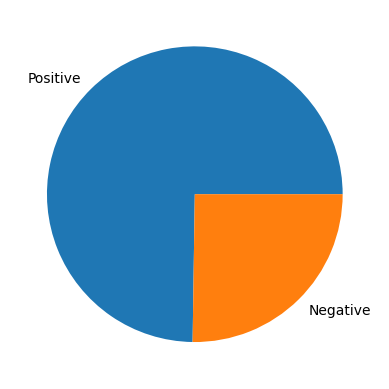

In [46]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

### Handle imbalanced dataset

In [41]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9414, 1270) (9414,)


In [56]:
y_train_smote.value_counts()

label
0    4707
1    4707
Name: count, dtype: int64

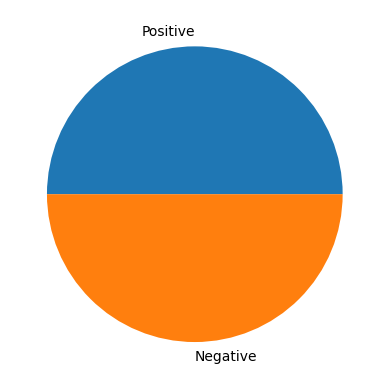

In [44]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [45]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(9414, 1270), dtype=float32)

In [46]:

y_train_smote

0       0
1       1
2       0
3       0
4       0
       ..
9409    1
9410    1
9411    1
9412    1
9413    1
Name: label, Length: 9414, dtype: int64

In [52]:

vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 1145), dtype=float32)

In [53]:

y_test

5696    0
6118    0
2505    0
3158    0
6934    0
       ..
4824    1
5425    0
7576    0
1125    0
5545    0
Name: label, Length: 1584, dtype: int64

## Model Training and Evaluation

In [47]:

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [48]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

### Logistic Regression

In [49]:

lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.946
	Precision = 0.923
	Recall = 0.974
	F1-Score = 0.947
Testing Scores:
	Accuracy = 0.884
	Precision = 0.74
	Recall = 0.831
	F1-Score = 0.783


### Naive Bayes

In [50]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.906
	Precision = 0.861
	Recall = 0.969
	F1-Score = 0.912
Testing Scores:
	Accuracy = 0.864
	Precision = 0.662
	Recall = 0.935
	F1-Score = 0.775


### Decision Tree

In [51]:

dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.809
	Precision = 0.621
	Recall = 0.612
	F1-Score = 0.617


### Random Forest

In [52]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.875
	Precision = 0.763
	Recall = 0.728
	F1-Score = 0.745


### Support Vector Machine

In [53]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.984
	Precision = 0.973
	Recall = 0.997
	F1-Score = 0.985
Testing Scores:
	Accuracy = 0.89
	Precision = 0.756
	Recall = 0.829
	F1-Score = 0.791


In [54]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(svm, file)